<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/ALP_DM_Kwandy_%26_Benito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALP Data Mining
### Kwandy Chandra - 0706022210001
### Benito Priyasha Amadeo - 0706022210021

In [ ]:
# Mengimpor library Pandas untuk memanipulasi dan menganalisis data dalam bentuk DataFrame.
import pandas as pd
# Mengimpor library NumPy untuk melakukan komputasi numerik dan operasi pada array multidimensi.
import numpy as np
# Mengimpor modul pyplot dari Matplotlib untuk membuat visualisasi grafis seperti grafik, plot, dan diagram.
import matplotlib.pyplot as plt
# Mengimpor library Seaborn untuk membuat visualisasi data statistik yang lebih estetis dan mudah digunakan.
import seaborn as sns
# Mengimpor LabelEncoder dari scikit-learn untuk mengubah data kategorikal menjadi representasi numerik.
from sklearn.preprocessing import LabelEncoder
# Mengimpor fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split
# Mengimpor DecisionTreeClassifier dari scikit-learn untuk membuat model klasifikasi berbasis Decision Tree.
from sklearn.tree import DecisionTreeClassifier
# Mengimpor metrik evaluasi seperti accuracy_score, confusion_matrix, dan classification_report untuk mengukur kinerja model.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor modul tree dari scikit-learn untuk bekerja dengan model decision tree, termasuk visualisasi Tree.
from sklearn import tree
# Mengimpor Gaussian Naive Bayes dari scikit-learn untuk membangun model klasifikasi berbasis Naive Bayes dengan distribusi Gaussian.
from sklearn.naive_bayes import GaussianNB
# Mengimpor Random Forest dari scikit-learn untuk membangun model klasifikasi berbasis Random Forest.
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

This dataset provides a comprehensive view of product performance across various categories, focusing on sales metrics, marketing efforts, and consumer feedback. An ideal resource for analyzing trends, optimizing marketing strategies, and predicting product success.

You can get the dataset from https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining/refs/heads/main/ALP%20DM.csv

In [ ]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining/refs/heads/main/ALP%20DM.csv')
df.head()

,Unnamed: 0,Product_Name,Category,Sub_category,Price,Rating,No_rating,Discount,M_Spend,Supply_Chain_E,Sales_y,Sales_m,Market_T,Seasonality_T,Success_Percentage
0,0,Non-stick Pan,Home & Kitchen,Cookware,669.23,1.6,3682,29.37,8654.97,50.76,95655,7587,0.44,4.20,59.348799
1,1,Tent,Sports & Outdoors,Outdoor Gear,67.13,3.2,2827,5.97,1918.00,90.22,41371,5555,-1.25,4.24,42.838493
2,2,Mascara,Beauty & Health,Makeup,463.25,3.5,4554,41.19,5885.23,87.81,97015,9716,-3.40,-9.75,83.379924
3,3,Cutlery Set,Home & Kitchen,Cookware,1499.18,2.9,4976,46.97,7984.91,78.10,32454,3697,-0.23,-6.62,43.678419
4,4,Blender,Home & Kitchen,Appliances,640.43,2.4,3806,47.16,7846.50,95.87,38213,5136,-4.80,-8.61,49.180016


In [ ]:
# rename the column
df.rename(columns={'Sub_category': 'SubCategory', 'Unnamed: 0' : 'ID'}, inplace=True)
df.head()

,ID,Product_Name,Category,SubCategory,Price,Rating,No_rating,Discount,M_Spend,Supply_Chain_E,Sales_y,Sales_m,Market_T,Seasonality_T,Success_Percentage
0,0,Non-stick Pan,Home & Kitchen,Cookware,669.23,1.6,3682,29.37,8654.97,50.76,95655,7587,0.44,4.20,59.348799
1,1,Tent,Sports & Outdoors,Outdoor Gear,67.13,3.2,2827,5.97,1918.00,90.22,41371,5555,-1.25,4.24,42.838493
2,2,Mascara,Beauty & Health,Makeup,463.25,3.5,4554,41.19,5885.23,87.81,97015,9716,-3.40,-9.75,83.379924
3,3,Cutlery Set,Home & Kitchen,Cookware,1499.18,2.9,4976,46.97,7984.91,78.10,32454,3697,-0.23,-6.62,43.678419
4,4,Blender,Home & Kitchen,Appliances,640.43,2.4,3806,47.16,7846.50,95.87,38213,5136,-4.80,-8.61,49.180016


In [ ]:
# describe data
df.describe()

,ID,Price,Rating,No_rating,Discount,M_Spend,Supply_Chain_E,Sales_y,Sales_m,Market_T,Seasonality_T,Success_Percentage
count,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,766.20076,2.99360,2551.020000,24.647160,5763.544960,75.098500,51192.204000,5122.296000,-0.061820,0.046740,48.006514
std,144.481833,439.83131,1.15109,1425.214214,14.837882,2639.606616,14.434724,28349.126031,2879.604143,2.844892,5.721412,17.804945
min,0.000000,6.11000,1.00000,11.000000,0.010000,1007.830000,50.210000,1047.000000,105.000000,-4.960000,-9.990000,1.000000
25%,124.750000,375.84750,2.00000,1336.750000,12.325000,3597.770000,62.420000,28377.750000,2611.250000,-2.542500,-4.727500,35.096248
50%,249.500000,787.40000,3.00000,2479.000000,23.840000,6007.110000,74.940000,49920.500000,5173.000000,-0.145000,-0.140000,46.147415
75%,374.250000,1159.92250,3.90000,3729.250000,37.880000,8169.945000,87.850000,76212.500000,7552.500000,2.350000,4.892500,60.655088
max,499.000000,1499.18000,5.00000,5000.000000,49.840000,9990.530000,99.900000,99919.000000,9996.000000,4.980000,9.970000,100.000000


In [ ]:
# Check for null values in the dataset
df.isnull().sum()

,0
ID,0
Product_Name,0
Category,0
SubCategory,0
Price,0
Rating,0
No_rating,0
Discount,0
M_Spend,0
Supply_Chain_E,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Product_Name        500 non-null    object 
 2   Category            500 non-null    object 
 3   SubCategory         500 non-null    object 
 4   Price               500 non-null    float64
 5   Rating              500 non-null    float64
 6   No_rating           500 non-null    int64  
 7   Discount            500 non-null    float64
 8   M_Spend             500 non-null    float64
 9   Supply_Chain_E      500 non-null    float64
 10  Sales_y             500 non-null    int64  
 11  Sales_m             500 non-null    int64  
 12  Market_T            500 non-null    float64
 13  Seasonality_T       500 non-null    float64
 14  Success_Percentage  500 non-null    float64
dtypes: float64(8), int64(4), object(3)
memory usage: 58.7+ KB

Column = 15 dan Row = 500

In [ ]:
# VISUALISASI

## Data Preprocessing

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['ID'])

# Verify data types
print(df.dtypes)

Product_Name           object
Category               object
SubCategory            object
Price                 float64
Rating                float64
No_rating               int64
Discount              float64
M_Spend               float64
Supply_Chain_E        float64
Sales_y                 int64
Sales_m                 int64
Market_T              float64
Seasonality_T         float64
Success_Percentage    float64
dtype: object


In [ ]:
# Encode categorical variables using One-Hot Encoding
categorical_columns = ['Category', 'SubCategory']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify encoding
print(df_encoded.head())

    Product_Name    Price  Rating  No_rating  Discount  M_Spend  \
0  Non-stick Pan   669.23     1.6       3682     29.37  8654.97   
1           Tent    67.13     3.2       2827      5.97  1918.00   
2        Mascara   463.25     3.5       4554     41.19  5885.23   
3    Cutlery Set  1499.18     2.9       4976     46.97  7984.91   
4        Blender   640.43     2.4       3806     47.16  7846.50   

   Supply_Chain_E  Sales_y  Sales_m  Market_T  ...  \
0           50.76    95655     7587      0.44  ...   
1           90.22    41371     5555     -1.25  ...   
2           87.81    97015     9716     -3.40  ...   
3           78.10    32454     3697     -0.23  ...   
4           95.87    38213     5136     -4.80  ...   

   SubCategory_Fitness Equipment  SubCategory_Footwear  SubCategory_Furniture  \
0                          False                 False                  False   
1                          False                 False                  False   
2                          Fa

Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

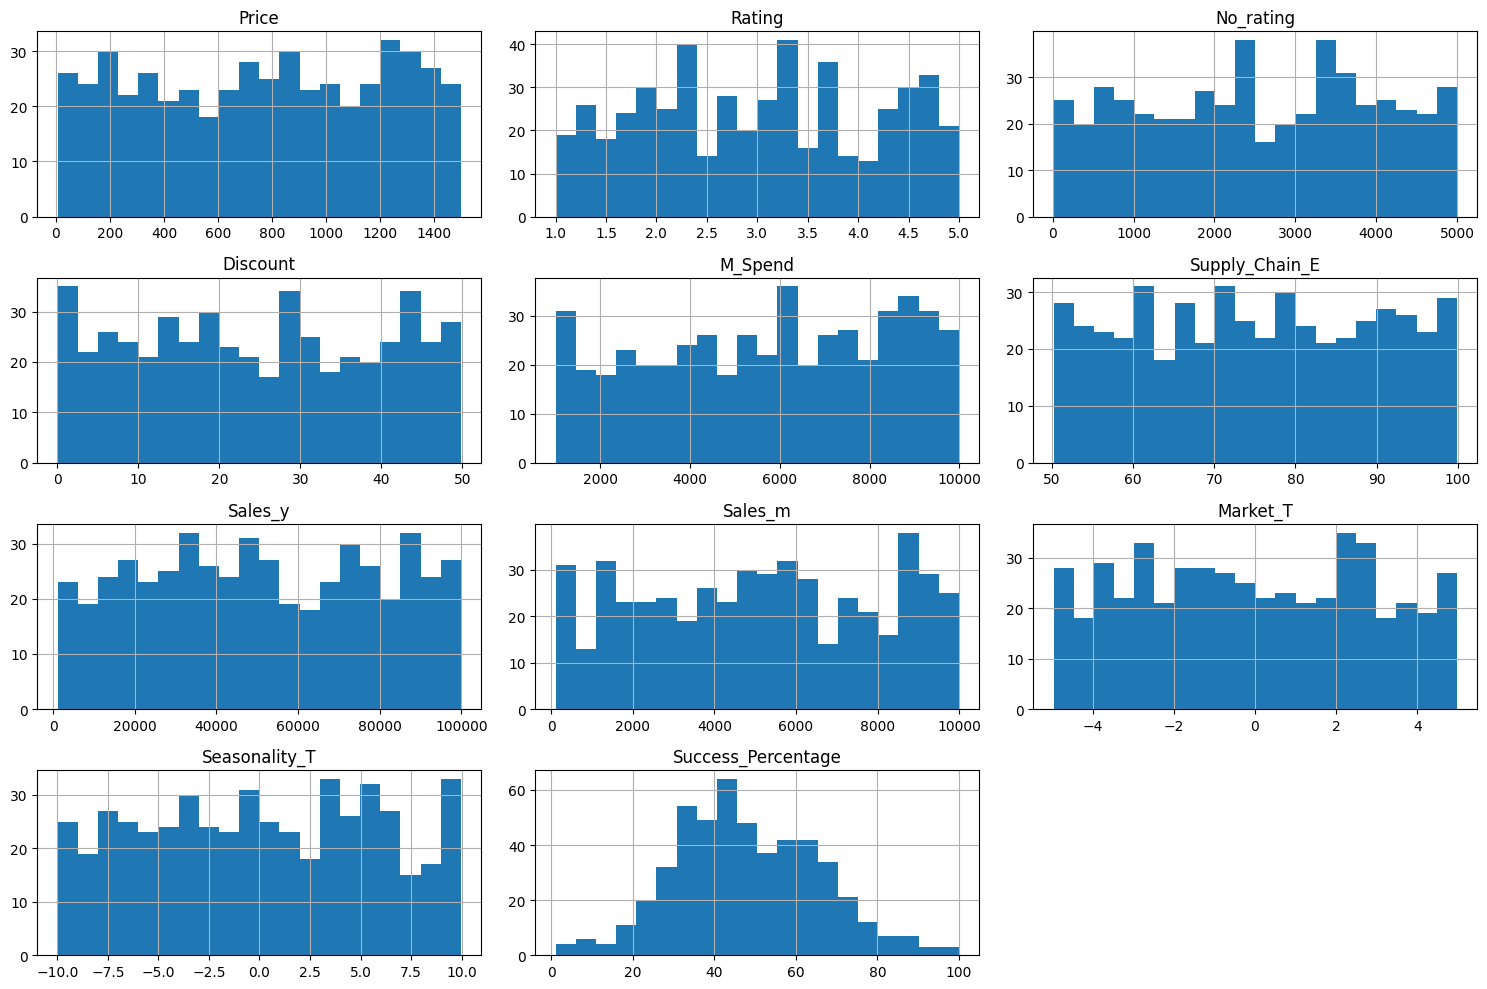

In [ ]:
# Histogram for numerical features
df_encoded.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

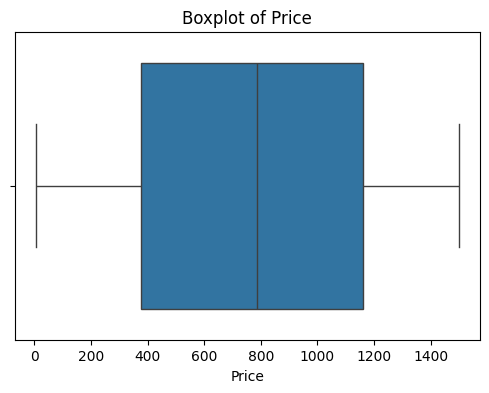

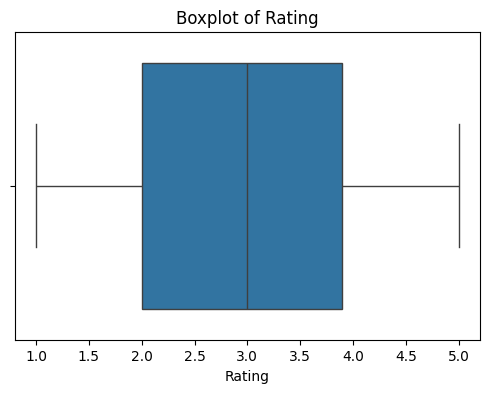

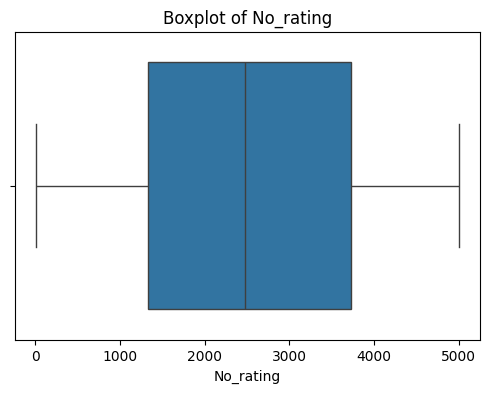

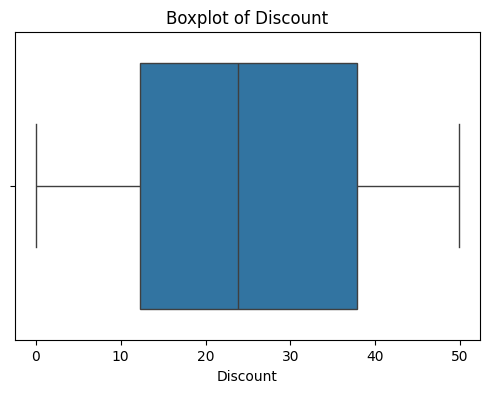

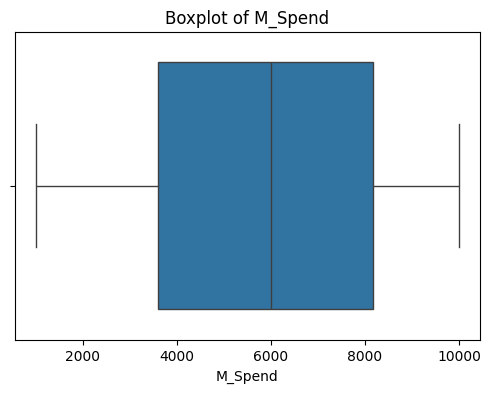

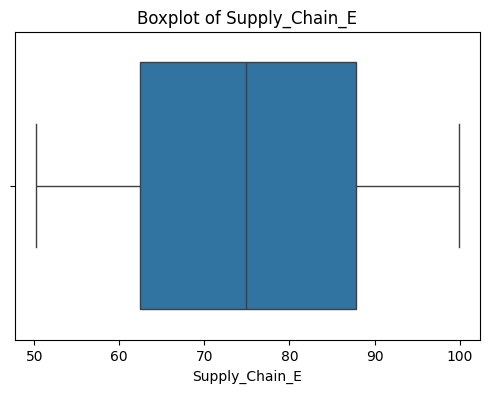

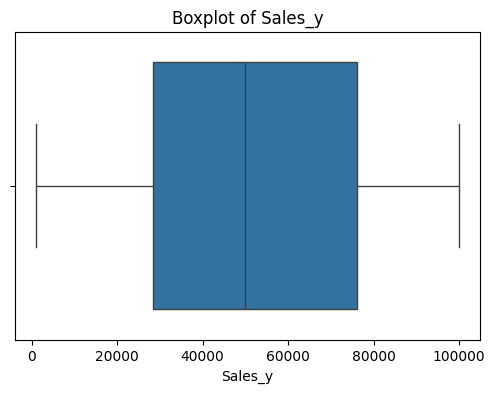

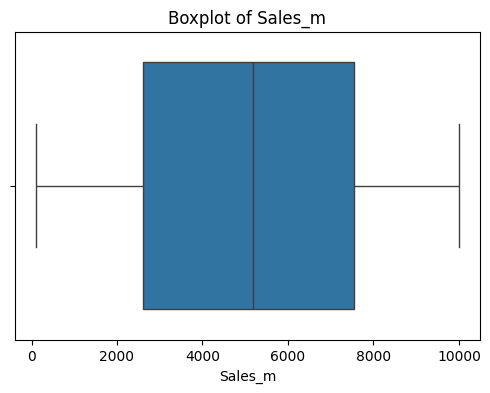

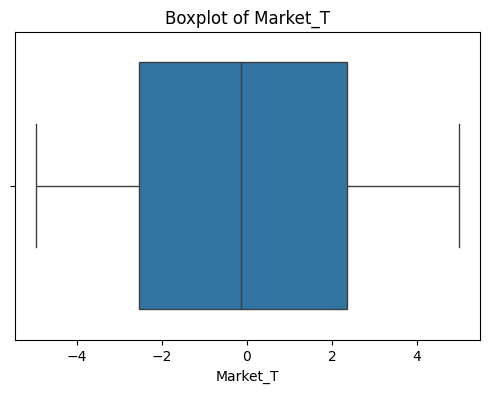

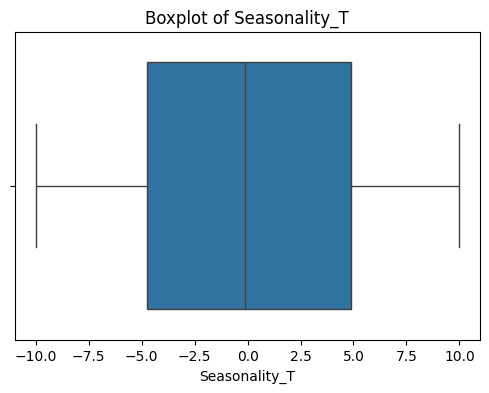

In [ ]:
# Boxplot to detect outliers
numerical_columns = ['Price', 'Rating','No_rating', 'Discount', 'M_Spend', 'Supply_Chain_E', 'Sales_y', 'Sales_m', 'Market_T', 'Seasonality_T']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

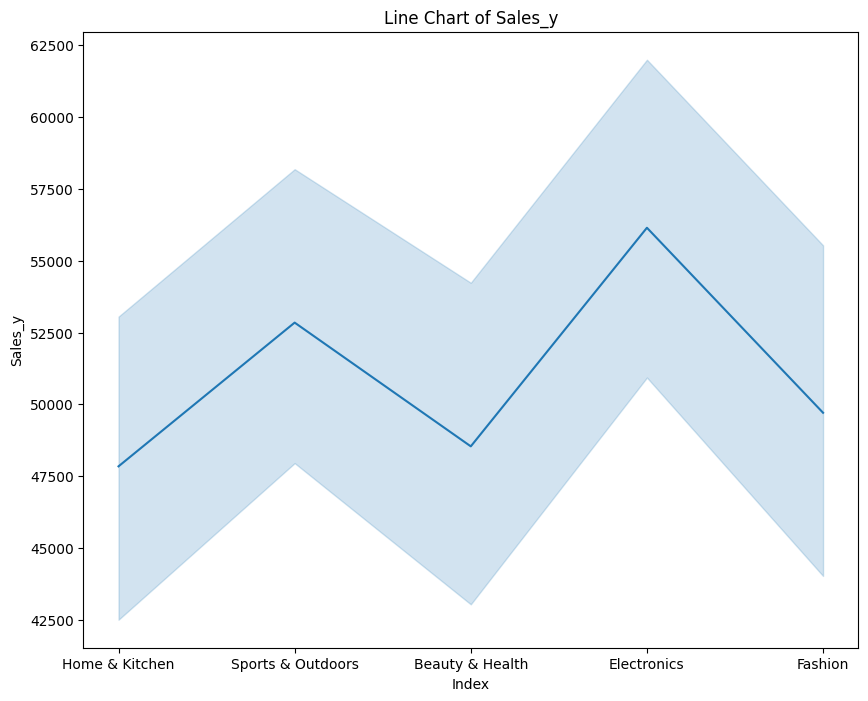

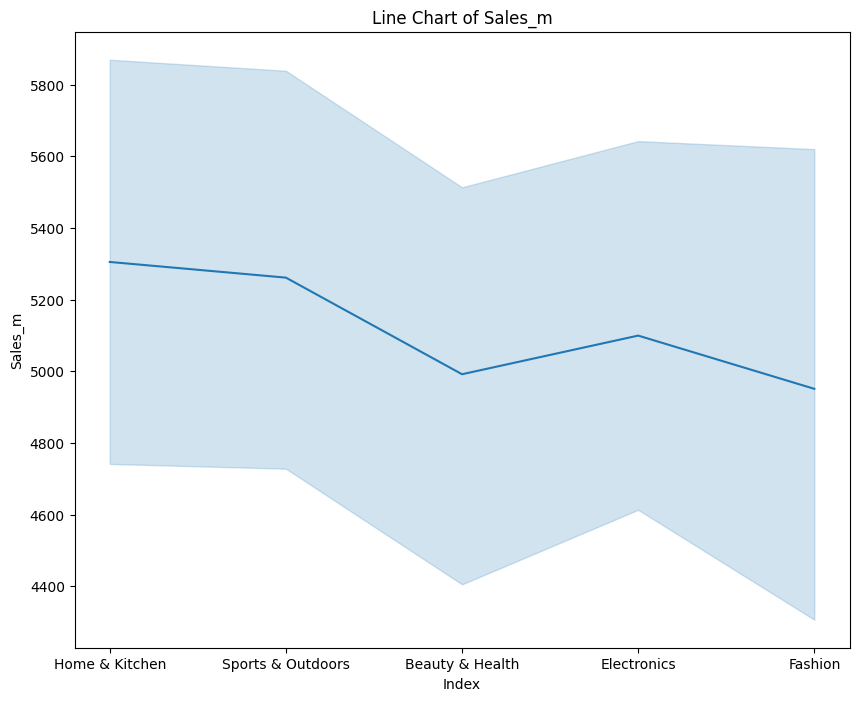

In [ ]:
# Line Chart Sales (Year)
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = [ 'Sales_y', 'Sales_m']

for col in numerical_columns:
    plt.figure(figsize=(10, 8))
    sns.lineplot(data=df, x=df['Category'], y=col)
    plt.title(f'Line Chart of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()


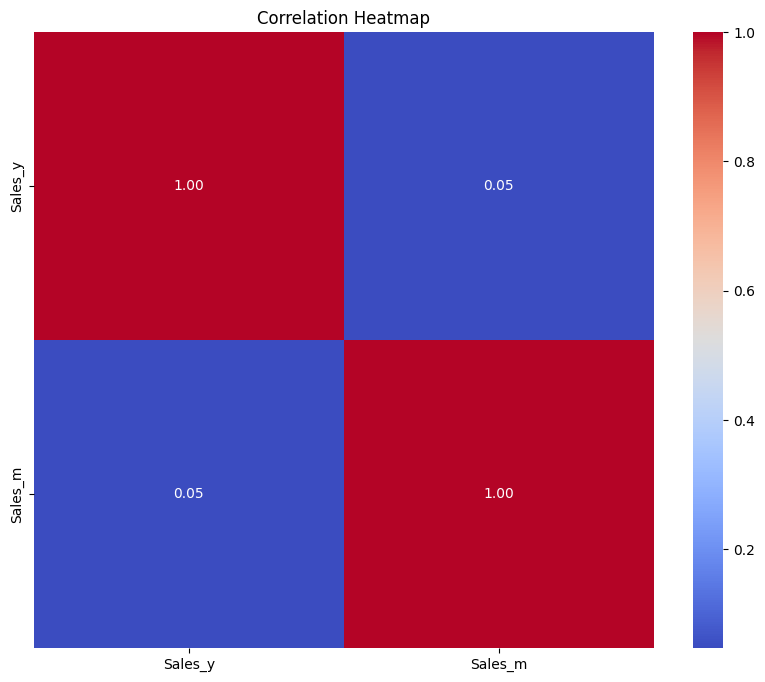

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[numerical_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

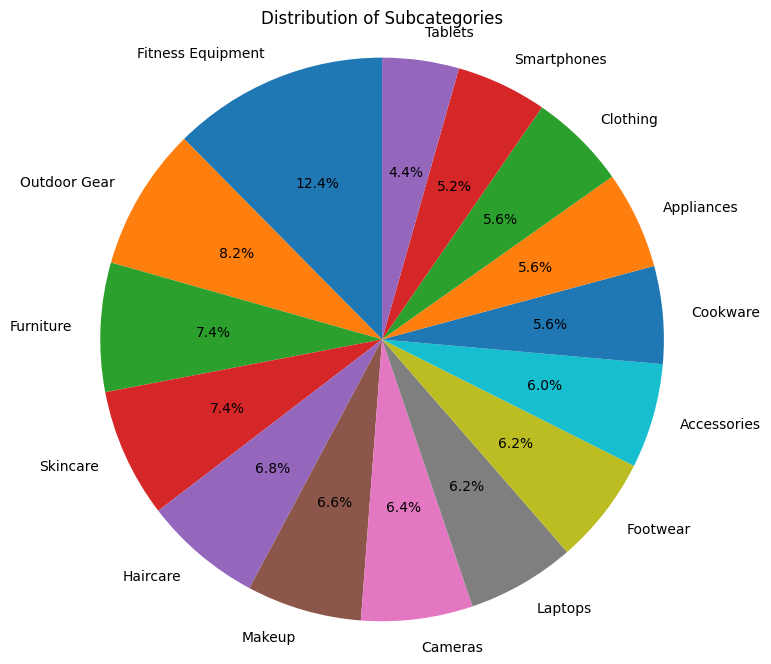

In [ ]:
# Pie chart for Sub Category

# Count the occurrences of each subcategory
subcategory_counts = df['SubCategory'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subcategory_counts, labels=subcategory_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Subcategories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# EDA

In [ ]:
# df_clustering = df_encoded['Rating', 'Sales_y','Sales_m']
clustering_column = ['Rating', 'Sales_y', 'Sales_m']
numerical_columns = ['Price', 'Rating','No_rating', 'Discount', 'M_Spend', 'Supply_Chain_E', 'Sales_y', 'Sales_m', 'Market_T', 'Seasonality_T']

# Scale numerical features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[numerical_columns])
df_encoded[numerical_columns] = scaled_features

scaler_clustering = StandardScaler()
scaled_feature = scaler_clustering.fit_transform(df_encoded[clustering_column])
df_clustering = scaled_feature

# Create bins for Success_Percentage
df_encoded['Success_Category'] = pd.cut(
    df['Success_Percentage'], bins=[0, 50, 100], labels=['Low', 'High']
)

# Verify changes
print(df_encoded.head())

    Product_Name     Price    Rating  No_rating  Discount   M_Spend  \
0  Non-stick Pan -0.220693 -1.211891   0.794346  0.318615  1.096497   
1           Tent -1.590998  0.179488   0.193835 -1.260009 -1.458322   
2        Mascara -0.689478  0.440371   1.406796  1.116022  0.046146   
3    Cutlery Set  1.668170 -0.081396   1.703189  1.505956  0.842394   
4        Blender -0.286239 -0.516201   0.881437  1.518774  0.789906   

   Supply_Chain_E   Sales_y   Sales_m  Market_T  ...  SubCategory_Footwear  \
0       -1.687796  1.569972  0.856775  0.176570  ...                 False   
1        1.048627 -0.346785  0.150416 -0.418072  ...                 False   
2        0.881501  1.617993  1.596853 -1.174569  ...                 False   
3        0.208144 -0.661642 -0.495458 -0.059176  ...                 False   
4        1.440436 -0.458293  0.004764 -1.667172  ...                 False   

   SubCategory_Furniture  SubCategory_Haircare  SubCategory_Laptops  \
0                  False         

# Classification

In [ ]:
# Split data
X = df_encoded.drop(columns=['Success_Percentage', 'Success_Category','Product_Name'])
y = df_encoded['Success_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = DecisionTreeClassifier()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("Decision Tree Results:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Decision Tree Results:
[[31 11]
 [ 7 51]]
              precision    recall  f1-score   support

        High       0.82      0.74      0.78        42
         Low       0.82      0.88      0.85        58

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100

Random Forest Results:
[[35  7]
 [ 3 55]]
              precision    recall  f1-score   support

        High       0.92      0.83      0.88        42
         Low       0.89      0.95      0.92        58

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.90      0.90      0.90       100



# Clustering

In [ ]:
df_clustering = df_encoded[['Rating', 'Sales_y','Sales_m']]

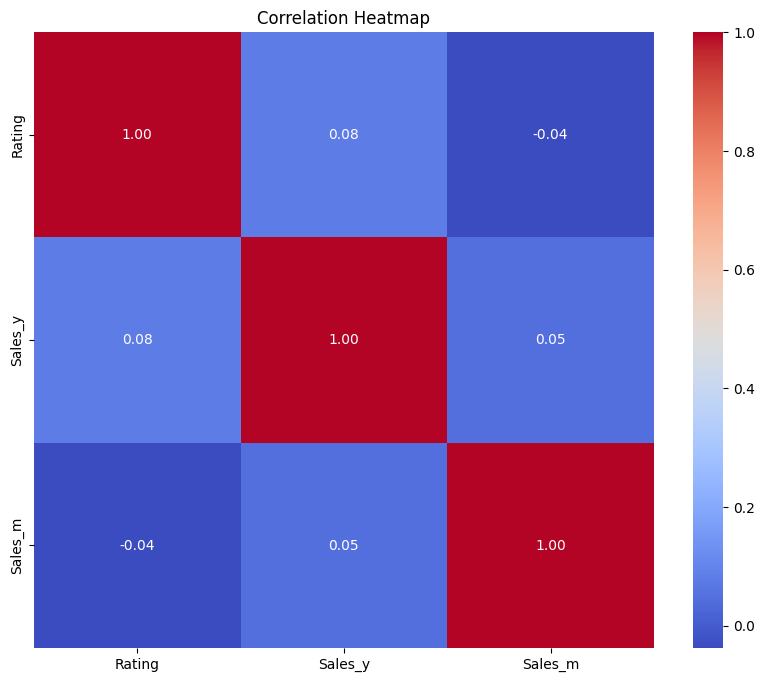

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clustering.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

In [ ]:
# set the parameter for evaluating K

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_clustering)
    inertia.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 11):  # Test k from 2 to 11
    kmeans = KMeans(n_clusters=k, init='random', max_iter=500, n_init=100, random_state=42)
    cluster_labels = kmeans.fit_predict(df_clustering)
    silhouette_scores.append(silhouette_score(df_clustering, cluster_labels))

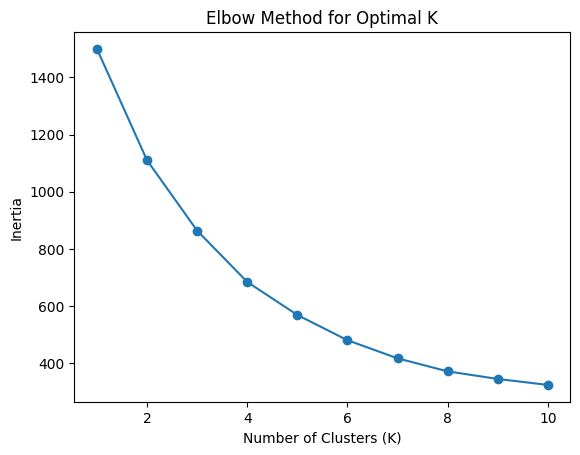

In [ ]:
# manually visualize the sillouette method using plotlib
# Plotting the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

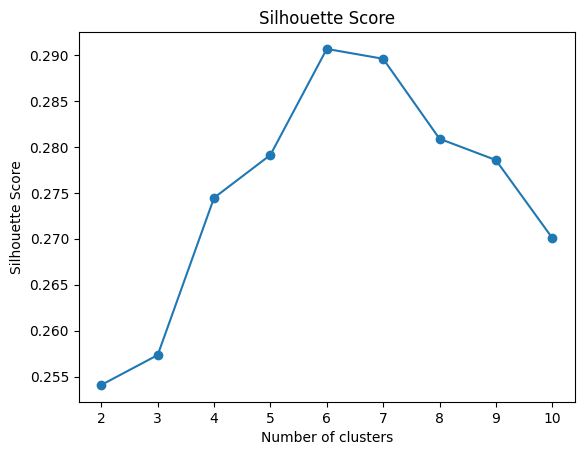

Best k: 6


In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.show()

# Find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print(f"Best k: {best_k}")

In [ ]:
# using kneelocator to find the elbow/knee
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
print(f"Optimal K (Elbow Point): {kl.elbow}")

Optimal K (Elbow Point): 4


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering using K-Means
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=500, n_init=100, random_state=42)
clusters = kmeans.fit(df_clustering)
cluster_labels = kmeans.labels_
cluster_labels

# Add cluster labels to the dataset
df_clustering['Cluster'] = cluster_labels

# # Silhouette Score
# silhouette_avg = silhouette_score(df_encoded[numerical_columns], clusters)
# print(f'Silhouette Score: {silhouette_avg}')

<ipython-input-135-c9a575b32c46>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Cluster'] = cluster_labels


### K-Means Algorithm

In [ ]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_clustering)
y_pred

array([3, 1, 2, 4, 4, 4, 4, 3, 1, 0, 2, 1, 2, 2, 1, 3, 1, 3, 4, 0, 4, 0,
       2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 0, 4, 1, 3, 1, 2, 0, 3, 1, 0, 0, 1,
       3, 4, 0, 1, 2, 0, 2, 1, 1, 1, 3, 3, 4, 4, 0, 1, 4, 1, 0, 1, 3, 1,
       0, 4, 1, 1, 1, 1, 2, 1, 3, 4, 2, 1, 4, 1, 0, 2, 0, 3, 3, 2, 4, 1,
       3, 3, 0, 2, 1, 4, 4, 1, 1, 2, 3, 1, 1, 2, 4, 4, 3, 1, 2, 0, 1, 2,
       0, 3, 2, 1, 1, 1, 3, 2, 1, 0, 1, 1, 1, 3, 3, 2, 1, 0, 1, 2, 1, 1,
       3, 0, 4, 1, 4, 4, 4, 1, 2, 1, 1, 1, 2, 4, 0, 0, 1, 1, 0, 4, 4, 1,
       3, 3, 1, 3, 3, 2, 4, 1, 2, 4, 3, 2, 1, 4, 2, 2, 4, 1, 4, 0, 1, 3,
       2, 2, 1, 3, 3, 1, 3, 2, 1, 1, 2, 1, 0, 0, 0, 1, 4, 3, 4, 3, 2, 0,
       1, 4, 1, 4, 1, 1, 0, 1, 4, 4, 1, 2, 4, 1, 2, 1, 2, 4, 4, 2, 3, 1,
       3, 3, 3, 1, 3, 4, 3, 1, 2, 0, 3, 3, 2, 1, 2, 1, 3, 2, 3, 3, 0, 3,
       3, 1, 1, 1, 3, 4, 1, 2, 0, 1, 3, 1, 4, 0, 0, 2, 1, 2, 3, 1, 0, 0,
       1, 2, 4, 0, 4, 4, 4, 0, 3, 1, 4, 1, 0, 4, 4, 1, 2, 3, 1, 1, 3, 0,
       4, 0, 0, 2, 2, 4, 2, 1, 0, 1, 1, 1, 3, 4, 1,

In [ ]:
# # Inverse transform the scaled data to get the original values
# Exclude non-numerical columns like 'Cluster' and 'KMeans' from inverse transform
scaled_features = df_clustering.drop(columns=['Cluster'])

# Perform inverse transformation on the scaled numerical data
original_values = scaler_clustering.inverse_transform(scaled_features)

# Create a new DataFrame with the original (inverse transformed) values
original_data_with_clusters = pd.DataFrame(original_values, columns=scaled_features.columns)

# Add the cluster labels back
original_data_with_clusters['Cluster'] = df_clustering['Cluster']
original_data_with_clusters['KMeans'] = y_pred

# Display the result
original_data_with_clusters.head()


,Rating,Sales_y,Sales_m,Cluster,KMeans
0,-1.211891,1.569972,0.856775,2,3
1,0.179488,-0.346785,0.150416,4,1
2,0.440371,1.617993,1.596853,1,2
3,-0.081396,-0.661642,-0.495458,0,4
4,-0.516201,-0.458293,0.004764,0,4


In [ ]:
# count data from each cluster
cluster_counts = original_data_with_clusters['KMeans'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts

,KMeans
KMeans,
0,74
1,167
2,74
3,95
4,90


In [ ]:
cluster_summary = original_data_with_clusters.groupby('Cluster').agg(
    {
    'Rating': ['mean', 'min', 'max'],
    'Sales_y': ['mean', 'min', 'max'],
    'Sales_m': ['mean', 'min', 'max']
    }
)

cluster_summary = cluster_summary.T

cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]

cluster_summary.columns.name = 'KMeans'

cluster_summary

KMeans        Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Rating  mean  -0.779984   0.843448  -1.036138  -0.452743   0.674338   1.000904
        min   -1.733658  -0.429240  -1.733658  -1.646696  -0.429240  -0.255318
        max    0.440371   1.744789   0.005566   0.962138   1.657827   1.744789
Sales_y mean  -0.881150   1.063448   0.017889   1.084174  -0.987568   0.019708
        min   -1.760094   0.010444  -1.699820   0.149388  -1.770616  -1.729269
        max    0.061785   1.720533   1.632011   1.719544   0.021002   1.643240
Sales_m mean  -0.711626   0.905761   0.944093  -0.680292   0.573545  -1.090421
        min   -1.739930  -0.509015  -0.223621  -1.730544  -0.476687  -1.744101
        max    0.652376   1.672634   1.690362   0.408696   1.694186  -0.098131

<write here>